<a href="https://colab.research.google.com/github/narendra1711/loan_prediction/blob/master/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installed Below Libraries

In [1]:
'''
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
'''

'\n!pip install pandas\n!pip install numpy\n!pip install matplotlib\n!pip install seaborn\n!pip install sklearn\n'

## Import Below Libraries

In [0]:
#gereral libraries
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#libraries for model evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    auc,
    average_precision_score)

#libraries for KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
#import dataset
input_file = 'loan_prediction/train_data.csv'
loan_df = pd.read_csv(input_file)

In [10]:
#data info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#first five observations
loan_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
#list all columns
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
#to get number of rows and columns: we use shape.
rows, cols = loan_df.shape
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 614
Number of columns: 13


In [18]:
#number of numerical variables
numeric_variables = len(loan_df._get_numeric_data().columns)
print("Number Of Numeric Variables Are:",numeric_variables)

Number Of Numeric Variables Are: 5


In [20]:
#number of categorical variables
categorical_variables = len(loan_df.columns)-len(loan_df._get_numeric_data().columns)
print("Number Of Categorical Variables Are:",categorical_variables)

Number of Categorical Variables Are: 8


In [24]:
#number of columns having missing values
number_of_missing_cols = loan_df.isnull().any().sum()
print("Here Are The Columns and Missing Values In That Column:")
print(loan_df.isnull().sum())
print("Number Of Columns That Have Missing Values Are:",number_of_missing_cols)

Here Are The Columns and Missing Values In That Column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Number Of Columns That Have Missing Values Are: 7


In [25]:
#number of rows that has missing values
no_rows_missing = loan_df.isnull().any(axis=1).sum()
print("Number Of Rows That Has Missing Values:",no_rows_missing)

Number Of Rows That Has Missing Values: 134


In [26]:
#number of columns that has missing values
no_cols_missing = loan_df.isnull().all().sum()
print("Number Of Cols That Has Missing Values:",no_cols_missing)

Number Of Cols That Has Missing Values: 0


In [27]:
#drop duplicate rows
print("Deleting Duplicate Rows...")
loan_df = loan_df.drop_duplicates(keep='first')
print("Duplicate Rows Deleted")

Deleting Duplicate Rows...
Duplicate Rows Deleted


In [34]:
#calculate what number of applications are approved /rejected? This is basically to check class imbalance.
count = pd.value_counts(loan_df['Loan_Status'].values, sort=False)

print("Total Number Of Applications:", (count[0]+count[1]))
print("Total Number Of Rejected Applications:", count[0])
print("Total Number Of Approved Applications:", count[1])

Total Number Of Applications: 614
Total Number Of Rejected Applications: 192
Total Number Of Approved Applications: 422


In [36]:
#calculate what percentage of applications are approved /rejected? This is basically to check class imbalance.
count_percent = round(100*((pd.value_counts(loan_df['Loan_Status'].values, sort=False))/len(loan_df.index)),2)  

print("Percentage Of Rejected Applications:", count_percent[0],"%")
print("Percentage Of Approved Applications:", count_percent[1],"%")

Percentage Of Rejected Applications: 31.27 %
Percentage Of Approved Applications: 68.73 %


In [37]:
#Statistics Summary

loan_df.describe()

#Explanation:
#1. if 25%,50%,75% values are far away from mean value that means there are outliers in that feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [52]:
#Identify outliers using quantile() for all features
Q1 = loan_df.quantile(0.25)
Q3 = loan_df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
lower_limit  = Q1-1.5*IQR
#print(lower_limit)
upper_limit = Q3+1.5*IQR
#print(upper_limit)

ApplicantIncome_upper_limit = upper_limit[0]
ApplicantIncome_lower_limit = lower_limit[0]
CoapplicantIncome_upper_limit = upper_limit[1]
CoapplicantIncome_lower_limit = lower_limit[1]
LoanAmount_upper_limit = upper_limit[2]
LoanAmount_lower_limit = lower_limit[2]
Loan_Amount_Term_upper_limit = upper_limit[3]
Loan_Amount_Term_lower_limit = lower_limit[3]
Credit_History_upper_limit = upper_limit[4]
Credit_History_lower_limit = lower_limit[4]

print("# Of Outliers for ApplicantIncome:", ((loan_df['ApplicantIncome'] > ApplicantIncome_upper_limit) | (loan_df['ApplicantIncome'] < abs(ApplicantIncome_lower_limit))).sum())
print("# Of Outliers for CoapplicantIncome:", ((loan_df['CoapplicantIncome'] > CoapplicantIncome_upper_limit) | (loan_df['CoapplicantIncome'] < abs(CoapplicantIncome_lower_limit))).sum())
print("# Of Outliers for LoanAmount:", ((loan_df['LoanAmount'] > LoanAmount_upper_limit) | (loan_df['LoanAmount'] < LoanAmount_lower_limit)).sum())
print("# Of Outliers for Loan_Amount_Term:", ((loan_df['Loan_Amount_Term'] > Loan_Amount_Term_upper_limit) | (loan_df['Loan_Amount_Term'] < Loan_Amount_Term_lower_limit)).sum())
print("# Of Outliers for Credit_History:", ((loan_df['Credit_History'] > Credit_History_upper_limit) | (loan_df['Credit_History'] < Credit_History_lower_limit)).sum())

# Of Outliers for ApplicantIncome: 61
# Of Outliers for CoapplicantIncome: 558
# Of Outliers for LoanAmount: 39
# Of Outliers for Loan_Amount_Term: 88
# Of Outliers for Credit_History: 89


In [53]:
#% of null values for each feature
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [54]:
#removing nulls from Loan Amount, Credit History, Loan amount term 
loan_df = loan_df[~np.isnan(loan_df['LoanAmount'])]
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

loan_df = loan_df[~np.isnan(loan_df['Credit_History'])]
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

loan_df = loan_df[~np.isnan(loan_df['Loan_Amount_Term'])]
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

Loan_ID              0.00
Gender               2.27
Married              0.38
Dependents           2.27
Education            0.00
Self_Employed        4.73
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     0.00
Credit_History       0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [55]:
#removing nulls from self_employed, Gender, Dependents, Married(categorical variables)
print(loan_df['Self_Employed'].value_counts())
loan_df.loc[pd.isnull(loan_df['Self_Employed']), ['Self_Employed']] = 'No'
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

print(loan_df['Gender'].value_counts())
loan_df.loc[pd.isnull(loan_df['Gender']), ['Gender']] = 'Male'
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

print(loan_df['Dependents'].value_counts())
loan_df.loc[pd.isnull(loan_df['Dependents']), ['Dependents']] = '0'
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

print(loan_df['Married'].value_counts())
loan_df.loc[pd.isnull(loan_df['Married']), ['Married']] = 'Yes'
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

#alternate way to find the count per feature
#loan_df.groupby(["Dependents"]).size()

No     434
Yes     70
Name: Self_Employed, dtype: int64
Male      422
Female     95
Name: Gender, dtype: int64
0     295
2      92
1      85
3+     45
Name: Dependents, dtype: int64
Yes    339
No     188
Name: Married, dtype: int64


Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [0]:
#unique values of a feature
loan_df.Married.unique()

In [0]:
#calculating the combined income and inserting a new column to loan_df
loan_df['comb_income'] = pd.DataFrame(loan_df['ApplicantIncome']+loan_df['CoapplicantIncome'])

In [57]:
#Finding the fraction of rows cost
print('data left(%):',(len(loan_df.index)/614)*100)

data left(%): 86.15635179153095


In [58]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,comb_income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [0]:
#dropping columns applicant and coapplicant income 
drop_cols = ['ApplicantIncome','CoapplicantIncome']
loan_df = loan_df.drop(drop_cols,axis=1)

In [61]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,comb_income
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,Y,9613.0


In [0]:
#sorting with respect to a variable in descending order
loan_df = loan_df.sort_values(by = 'comb_income',ascending = False)

In [0]:
loan_df.shape

In [0]:
#converting the categorical target variable into dummies (0,1's)
loan_df['Status'] = pd.get_dummies(loan_df['Loan_Status'], drop_first=True)
loan_df.drop(['Loan_Status'], axis=1, inplace=True)

In [0]:
#if there is a space in columnnames then replace it
loan_df.columns = loan_df.columns.str.replace(' ','')

In [0]:
'''The functions takes column name as an argument and returns the top and bottom observation in that dataframe'''
def min_max_values(col):
    
    top = loan_df[col].idxmax()
    top_obs = pd.DataFrame(loan_df.loc[top])
    
    bottom = loan_df[col].idxmin()
    bottom_obs = pd.DataFrame(loan_df.loc[bottom])
    
    min_max_obs = pd.concat([top_obs, bottom_obs], axis=1)
    
    return min_max_obs

In [67]:
#applicable only for numerical variable
min_max_values('comb_income')
min_max_values('LoanAmount')

,171,568
Loan_ID,LP001585,LP002840
Gender,Male,Female
Married,Yes,No
Dependents,3+,0
Education,Graduate,Graduate
Self_Employed,No,No
LoanAmount,700,9
Loan_Amount_Term,300,360
Credit_History,1,1
Property_Area,Urban,Urban


##Visualization of Numerical / Quantitative Variables(Univariate Analysis)

(array([439.,  70.,  12.,   0.,   4.,   1.,   1.,   1.,   0.,   1.]),
 array([ 1442. ,  9397.8, 17353.6, 25309.4, 33265.2, 41221. , 49176.8,
        57132.6, 65088.4, 73044.2, 81000. ]),
 <a list of 10 Patch objects>)

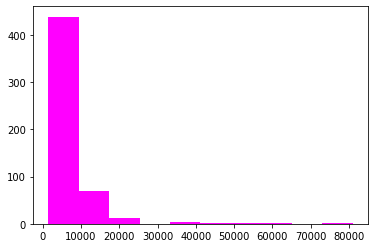

In [68]:
#histogram of continuous numerical variables
plt.hist(loan_df['comb_income'],color='Magenta')

#observation:
#1. majority of people have combined income between a range of approx.1000 to 10000
#2. data spread is very high on right hand side
#3. people with income 40000 to 80000 are far away from the other set of people 
#4. data on tail side can be removed for analysis

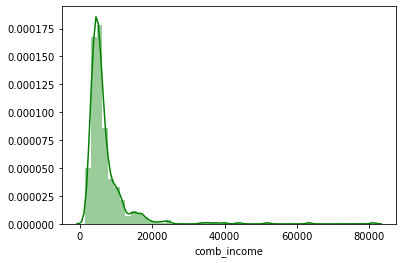

In [69]:
#probability Distribution Function
sns.distplot(loan_df['comb_income'],color='green')

#observation:
#1. In histogram we get the count/actual value for every data on x axis, But here we get % instead of actual value
#2. Area under the curve here is equal to '1'
#3. % value always lie between '0' and '1'

(array([ 66., 275., 128.,  30.,  13.,   6.,   4.,   3.,   3.,   1.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

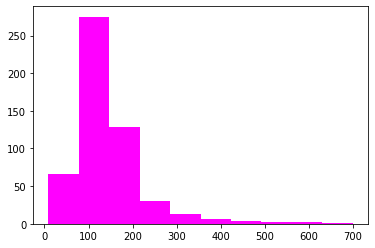

In [70]:
#histogram of continuous numerical variables
plt.hist(loan_df['LoanAmount'],color='Magenta')

#observation:
#1. majority of people applied for loan amount between a range of approx.90 to 130
#2. data spread is high on right hand side
#3. people having loan_amount applied=500-700 are far away from the other set of people 
#4. data on tail side can be removed for analysis

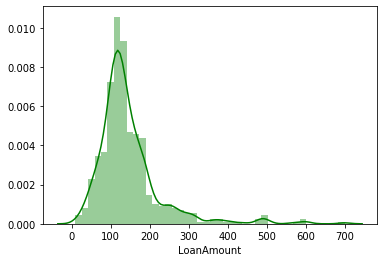

In [71]:
#probability Distribution Function
sns.distplot(loan_df['LoanAmount'],color='green')

#observation:
#1. In histogram we get the count/actual value for every data on x axis, But here we get % instead of actual value
#2. Area under the curve here is equal to '1'
#3. % value always lie between '0' and '1'

(array([  4.,   6.,   0.,  41.,   2.,  10.,   0., 452.,   0.,  14.]),
 array([ 36. ,  80.4, 124.8, 169.2, 213.6, 258. , 302.4, 346.8, 391.2,
        435.6, 480. ]),
 <a list of 10 Patch objects>)

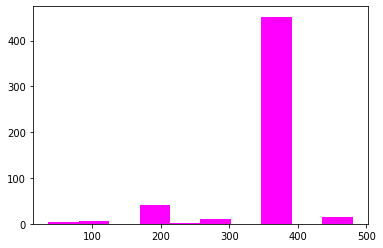

In [72]:
#histogram of continuous numerical variables
plt.hist(loan_df['Loan_Amount_Term'],color='Magenta')

#observation:
#1. the data is highly distributed 
#2. maximum people have term amount between 350 to 390 approx.

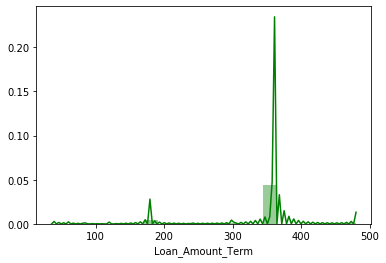

In [73]:
#probability Distribution Function
sns.distplot(loan_df['Loan_Amount_Term'],color='green')

#observation:
#1. In histogram we get the count/actual value for every data on x axis, But here we get % instead of actual value
#2. Area under the curve here is equal to '1'
#3. % value always lie between '0' and '1'

(array([ 79.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 450.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

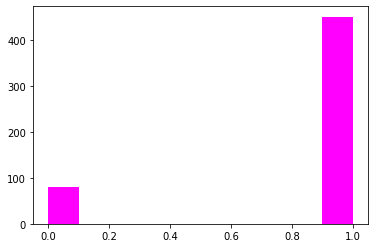

In [74]:
#histogram of continuous numerical variables
plt.hist(loan_df['Credit_History'],color='Magenta')

#observation:
#1. can be better represented by categopry
#2. maximum people have credit history between 0.9 to 1.0 approx.

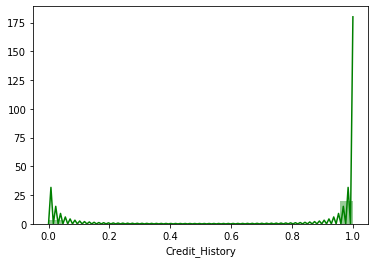

In [75]:
#probability Distribution Function
sns.distplot(loan_df['Credit_History'],color='green')

#observation:
#1. In histogram we get the count/actual value for every data on x axis, But here we get % instead of actual value
#2. Area under the curve here is equal to '1'
#3. % value always lie between '0' and '1'

In [76]:
#select all numerical variables and analyzing them
loan_num = loan_df.select_dtypes(include=['float64','int64'])
loan_num.head()

,LoanAmount,Loan_Amount_Term,Credit_History,comb_income
409,360.0,360.0,0.0,81000.0
333,490.0,180.0,1.0,63337.0
171,700.0,300.0,1.0,51763.0
185,120.0,360.0,1.0,43897.0
155,600.0,180.0,0.0,39999.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9723ee898>,
      dtype=object)

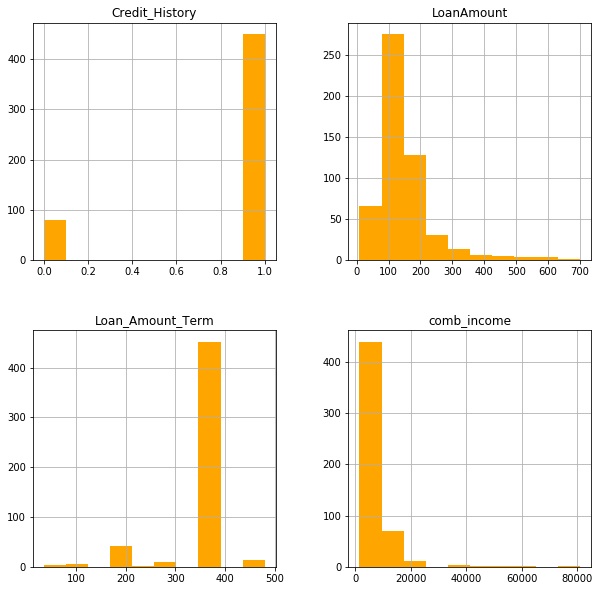

In [77]:
loan_num.hist(color='orange',histtype='bar',stacked=True,fill=True,figsize=(10,10))

#observation:
#1. Credit history can be better represented by making it as 'Category'
#2. For Loan amount Term a) the data is highly distributed 
#                        b) maximum people have term amount between 350 to 390 approx.
#3. For Loan Amount a) majority of people applied for loan amount between a range of approx.90 to 130
#                   b) data spread is high on right hand side
#                   c) people having loan_amount applied=500 are far away from the other set of people 
#                   d) data on tail side can be removed for analysis
#4. For Comb Income a) majority of people have combined income between a range of approx.1000 to 10000
#                   b) data spread is very high on right hand side
#                   c) people with income approx.38000 are far away from the other set of people 
#                   d) data on tail side can be removed for analysis

## Correlation, Pairplot, Heatmap

In [78]:
#Correlation with the variable of interest
comb_income_corr = loan_num.corr()['comb_income'][:-1]  #[:-1] is for not taking the correlation with variable itself
comb_income_corr

#observation:
#1. LoanAmount is directly proportional to combined income, and other numerical variables are inversely proportional
#2. LoanAmount has +ve relation and other two have -ve relation
#3. loan amount has medium relation with comb_income, so as the combined income increases the loan amount will also increase
#4. There is no relation between comb_income and (loan_amoun_term and credit history), since correlation value is < 0.1

LoanAmount          0.615632
Loan_Amount_Term   -0.061205
Credit_History     -0.027265
Name: comb_income, dtype: float64

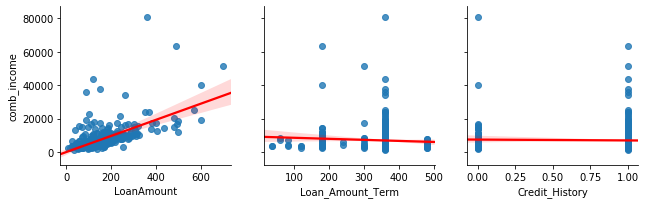

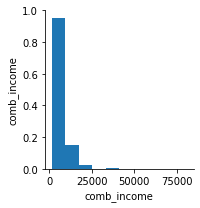

In [79]:
#correlation plots using 'pairplots'
for i in range(0,len(loan_num.columns),3):
    sns.pairplot(loan_num,y_vars=['comb_income'],
                 x_vars=loan_num.columns[i:i+3],
                 kind='reg',
                 plot_kws={'line_kws':{'color':'red'}},
                 height=3
                )

#observation:
#1. If the dots are downward sloping then negative relation, upward sloping positive relation
#2. comb_income and loan_amount has medium positive relationship as the variance is medium
#3. Useful for detecting the outliers/extreme values

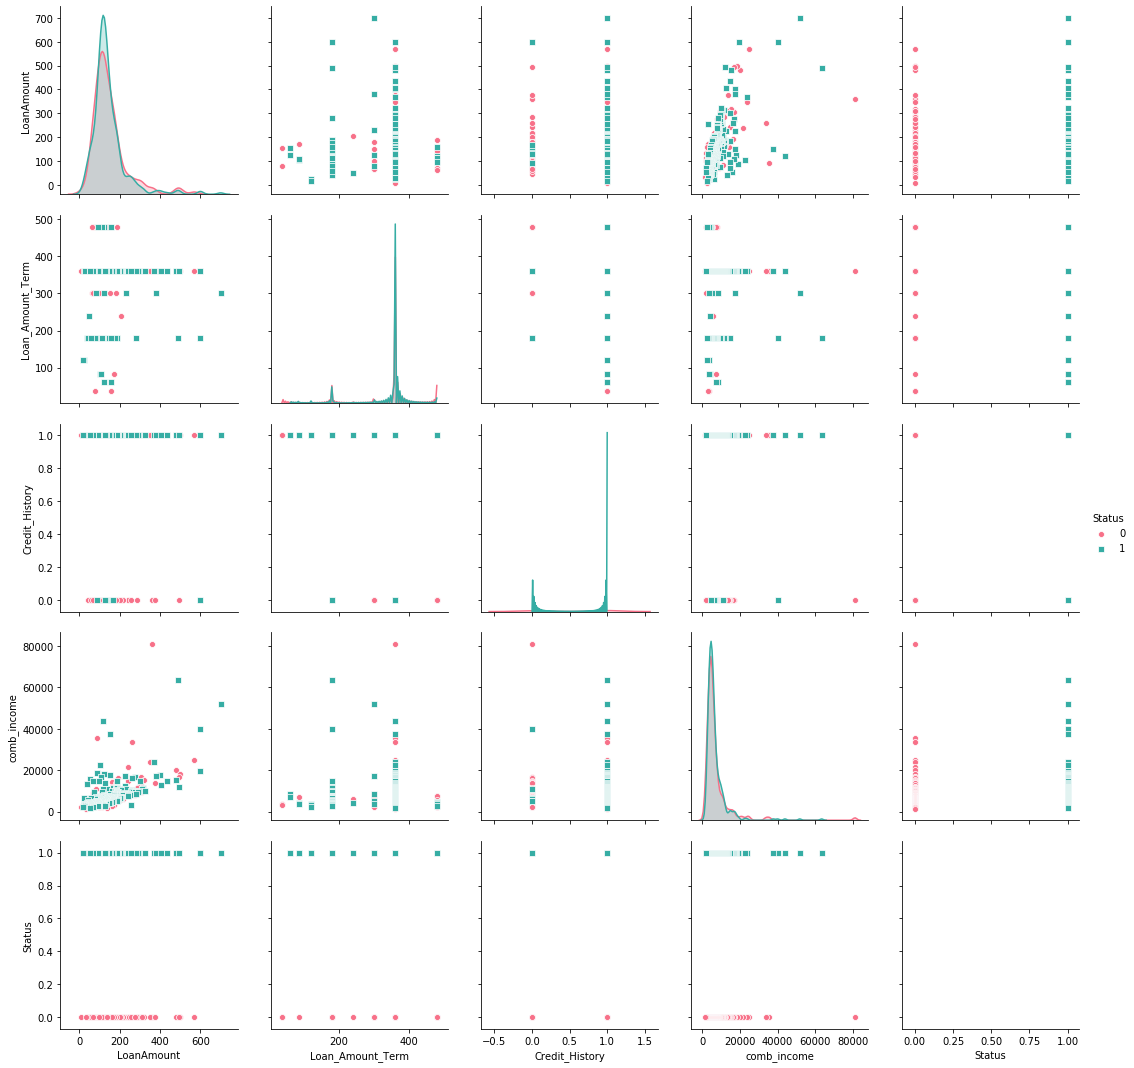

In [80]:
sns.pairplot(loan_df, 
             hue='Status', 
             palette='husl', 
             height=3, 
             markers=["o", "s"], 
             diag_kind="kde")

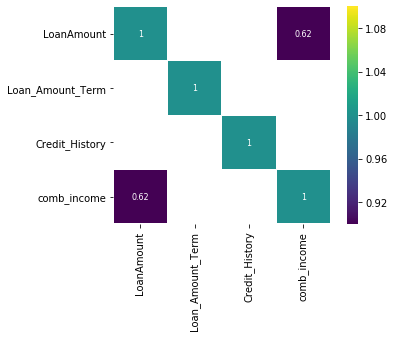

In [81]:
#plotting significant correlation in one map ('heatmap')
corr = loan_num.corr()
sns.heatmap(corr[(corr >= 0.5)], 
            cmap='viridis', 
            annot=True, 
            vmax=1.0, 
            vmin=1.0, 
            linewidths=0.1, 
            annot_kws={"size":8}, 
            square=True
           )

#observation:
#1. there is no relation between the loan_amount, loan_amount term anmd credit history
#2. squares which have no color indicates that no relationship
#3. there is a high relation between loan amount and comb_income

##Visualization of Numerical variables(Bivariate Analysis)

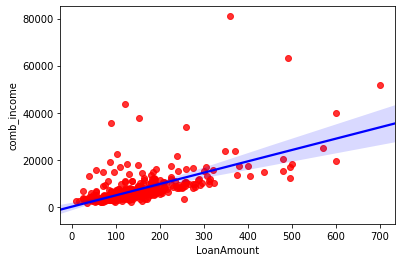

In [82]:
#regression Plot
sns.regplot(loan_df['LoanAmount'],loan_df['comb_income'],scatter_kws={"color": "red"}, line_kws={"color": "blue"})

#observation:
#1. there is strong positive relationship between loan_amount and comb_income

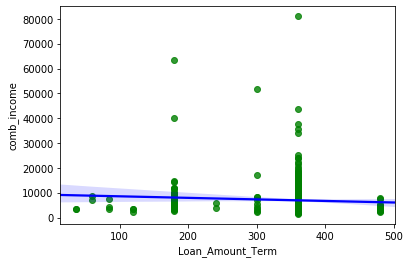

In [83]:
#regression Plot
sns.regplot(loan_df['Loan_Amount_Term'],loan_df['comb_income'],scatter_kws={"color": "green"}, line_kws={"color": "blue"})

#observation:
#1. there is no relationship between loan_amount_term and comb_income

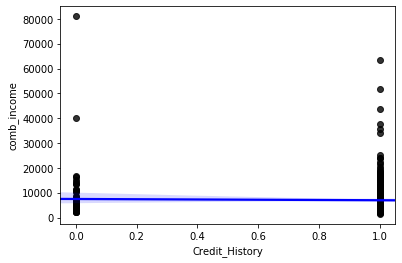

In [84]:
#regression Plot
sns.regplot(loan_df['Credit_History'],loan_df['comb_income'],scatter_kws={"color": "black"}, line_kws={"color": "blue"})

#observation:
#1. there is no relation between credit history and com_income

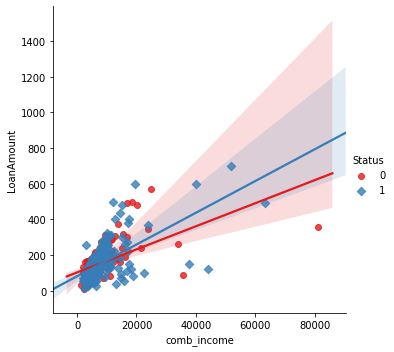

In [85]:
#linear plot
sns.lmplot(x="comb_income" , y = "LoanAmount" , hue = "Status" , markers=["o", "D"], data = loan_df, palette='Set1')

#observation:
#1. As the comb_income increase loan amount also increases

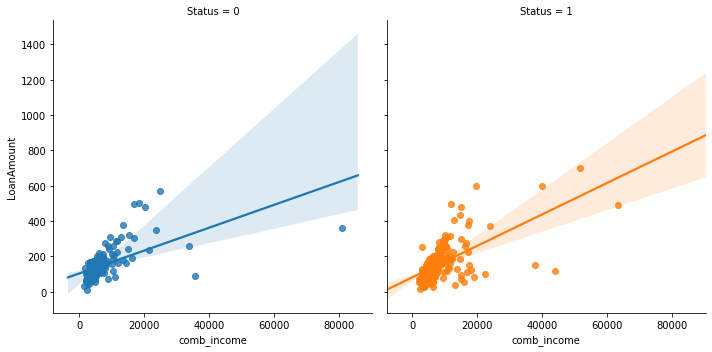

In [86]:
#linear plot
sns.lmplot(x="comb_income" , y = "LoanAmount" ,hue='Status', col = "Status", data=loan_df)

#observation:
#1. base on status impact of comb_income on loan amount is visualized

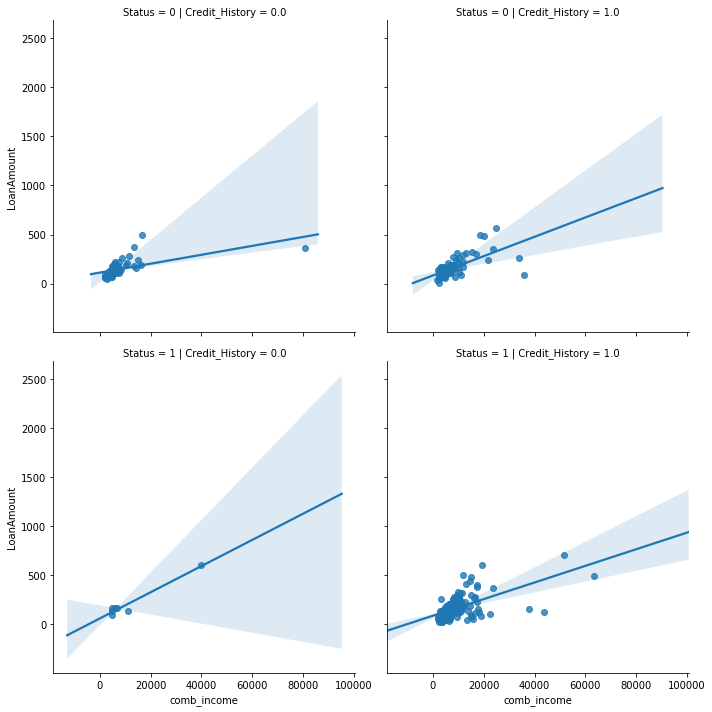

In [87]:
#linear plot
sns.lmplot(x="comb_income" , y = "LoanAmount" ,row='Status', col = "Credit_History", data=loan_df)

#observation:
#1. condition of two variables status and credit history on comb_income affecting loan_amount
#2. credit history plays a role in approval and rejection of loan application

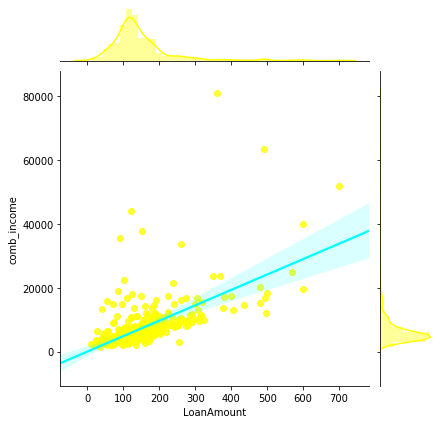

In [88]:
#joint plot with kind=reg
sns.jointplot(x='LoanAmount', y='comb_income', data=loan_df, kind='reg', color='yellow',joint_kws={'line_kws':{'color':'cyan'}})

#Observation:
#1. Curve on the top shows distribution of Loan Amount
#2. Curve on the right shows distribution of comb_income
#3. Plot shows as loan amount increases com_income requriement also increase i.e loan_amount is directly proportional to comb_income

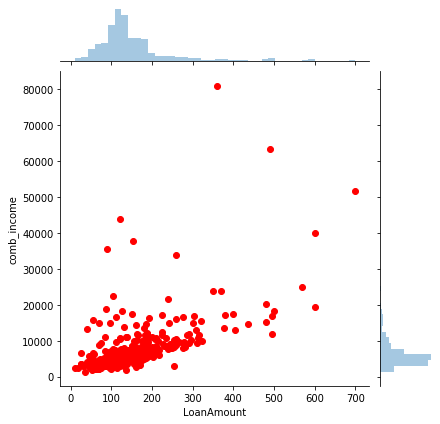

In [89]:
#joint plot with kind=scatter
sns.jointplot(x='LoanAmount', y='comb_income', data=loan_df, kind='scatter', joint_kws={'color':'red'})

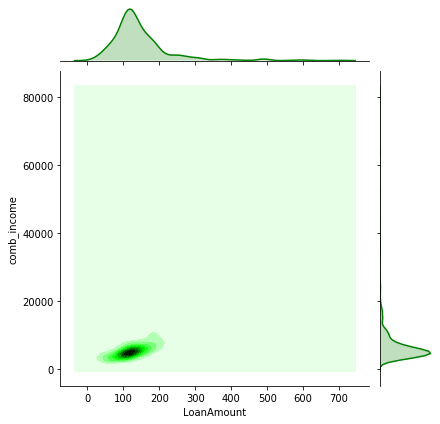

In [90]:
#Joint Plot with kind=kde
sns.jointplot(x='LoanAmount', y='comb_income', data=loan_df, kind='kde', color='green')

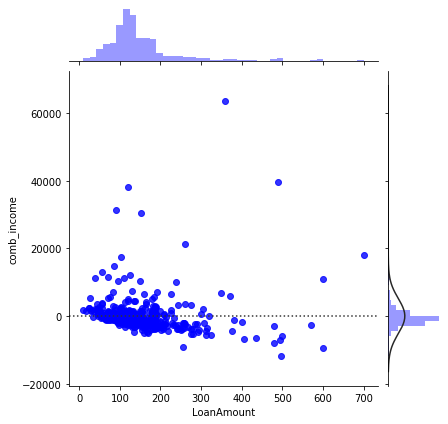

In [91]:
#Joint Plot with kind=resid
sns.jointplot(x='LoanAmount', y='comb_income', data=loan_df, kind='resid', color='blue')

## Visualization of Categorical / Qualitative Variables(Univariate Analysis)

In [92]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Gender').size()
gender_dist

Gender
Female     95
Male      434
dtype: int64

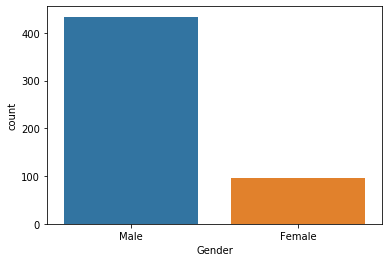

In [93]:
#distribution of categorical variables
#count plot
sns.countplot(loan_df.Gender)

#observation:
#1. Number of male applicants are much greater than female applicants

In [94]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Married').size()
gender_dist

Married
No     188
Yes    341
dtype: int64

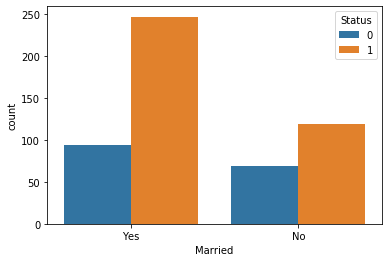

In [95]:
#distribution of categorical variables
#count plot
sns.countplot(data=loan_df,x= 'Married', hue='Status')

#observation:
#1. Married applicants are getting the loan approved compared to unmarried 

In [96]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Education').size()
gender_dist

Education
Graduate        421
Not Graduate    108
dtype: int64

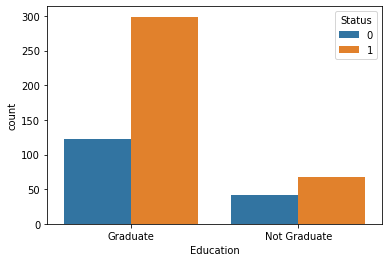

In [97]:
#distribution of categorical variables
#count plot
sns.countplot(data=loan_df,x= 'Education', hue='Status')

#observation:
#1. graduate applicants are getting loans approved compared to undergraduates

In [98]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Dependents').size()
gender_dist

Dependents
0     307
1      85
2      92
3+     45
dtype: int64

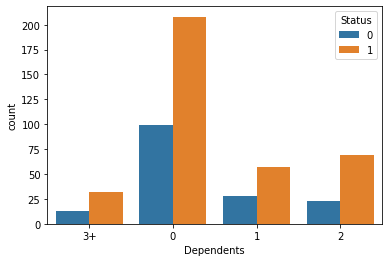

In [99]:
#distribution of categorical variables
#count plot
sns.countplot(data=loan_df,x= 'Dependents', hue='Status')

#observation:
#1. applicants with 0 dependents got the loan approved
#2. applicants with 3+ have very less number whose loan got approved
#3. applicants with 1 and 2 dependents are average compared to other two

In [100]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Self_Employed').size()
gender_dist

Self_Employed
No     459
Yes     70
dtype: int64

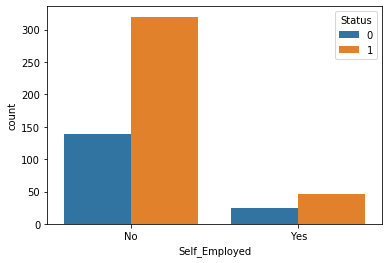

In [101]:
#distribution of categorical variables
#count plot
sns.countplot(data=loan_df,x= 'Self_Employed', hue='Status')

#observation:
#1. those who are not self employed, their loans approved as compared to who are self employed

In [102]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Property_Area').size()
gender_dist

Property_Area
Rural        155
Semiurban    209
Urban        165
dtype: int64

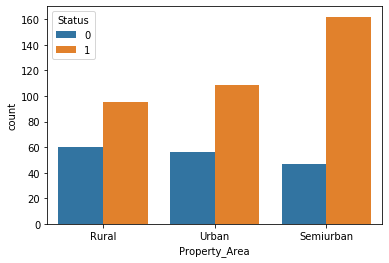

In [103]:
#distribution of categorical variables
#count plot
sns.countplot(data=loan_df,x= 'Property_Area', hue='Status')

#observation:
#1. numnber of Applicants having property area in semiurban > urban > rural
#2. applicants having semiurban property area have loans approved

In [104]:
#Count by category- cross tabulation  (simply gives count of each categopry)
gender_dist = loan_df.groupby('Status').size()
gender_dist

Status
0    163
1    366
dtype: int64

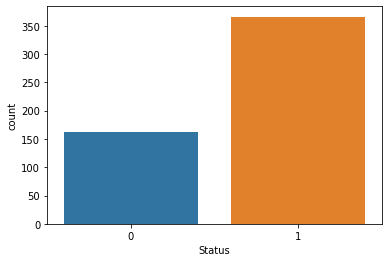

In [105]:
#distribution of categorical variables
#count plot
sns.countplot(loan_df.Status)

#observation:
#1. Loan is approved for more number of applicants(almost double than rejected)

##Bivariate Analysis (Category,Numerical)

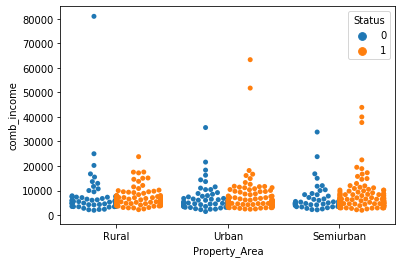

In [106]:
#Swarmplot
sns.swarmplot(x='Property_Area', y ='comb_income', hue ='Status', data=loan_df, split=True)

#Observation:
#1. We have few outliers in Urban and semiurban area
#2. Applicants whose property area is urban are more likely to get loan approved
#3. there is no effect on comb_income for property area

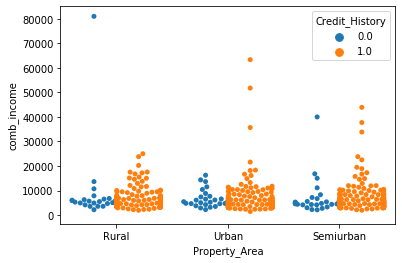

In [107]:
#Swarmplot
sns.swarmplot(x='Property_Area', y ='comb_income', hue ='Credit_History', data=loan_df, split=True)

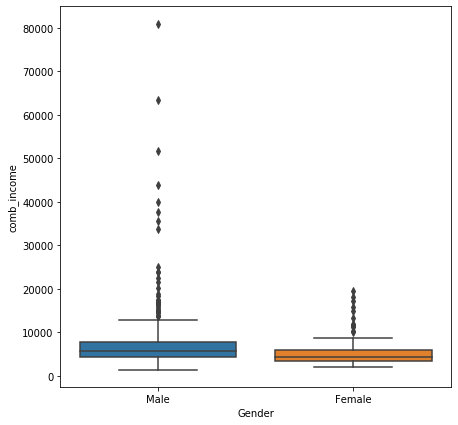

In [108]:
#boxplot for categorical variables
#box_gender = sns.boxplot(x='Gender', y='comb_income', data=loan_df, palette='Set1', linewidth=0.8, width=0.4, whis=5)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_gender = sns.boxplot(x='Gender', y='comb_income', data=loan_df, ax=ax)

#observation:
#1. there is more variation of combined income in female category compared to male
#2. Males having comb_income of approx. >12000 are outliers
#3. Females having comb_income of approx. >9500 are outliers

In [109]:
#gives total count, unique values of,top category,and no of records of top category
loan_df['Gender'].describe()

count      529
unique       2
top       Male
freq       434
Name: Gender, dtype: object

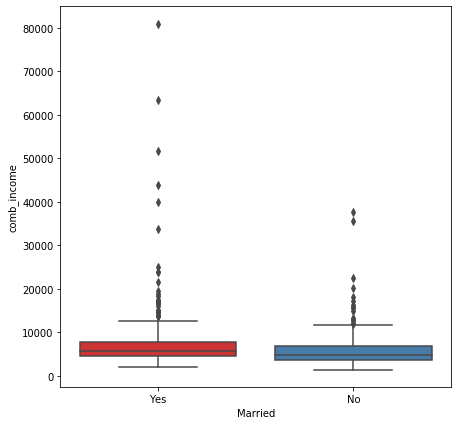

In [110]:
#boxplot for categorical variables
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_married = sns.boxplot(x='Married', y='comb_income', data=loan_df, palette='Set1', ax=ax)

#observation:
#1. there is more variation of combined income in married category compared to not married
#2. Males having comb_income of approx. >12000 are outliers
#3. Females having comb_income of approx. >10000 are outliers

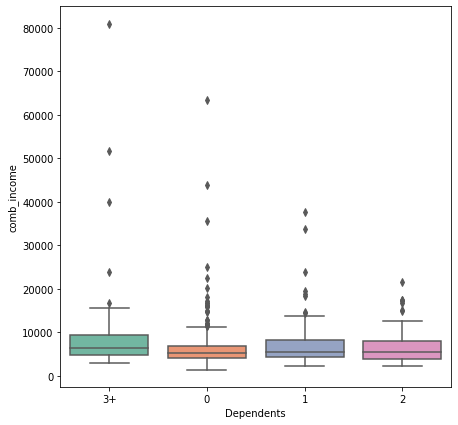

In [111]:
#boxplot for categorical variables
#box_dependents = sns.boxplot(x='Dependents', y='comb_income', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_dependents = sns.boxplot(x='Dependents', y='comb_income', data=loan_df, palette='Set2', ax=ax)

#observation:
#1. there is more variation of combined income 3+ dependents
#2. For 1 dependent, data is equally centered

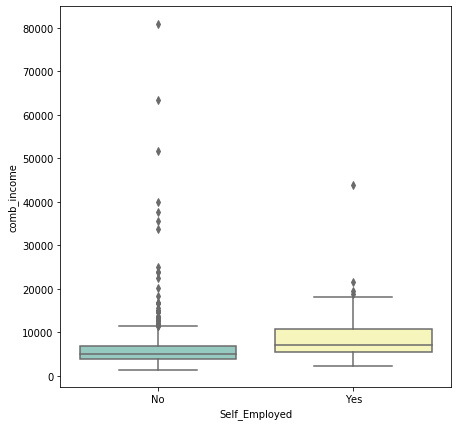

In [112]:
#boxplot for categorical variables
#box_self_employed = sns.boxplot(x='Self_Employed', y='comb_income', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_self_employed = sns.boxplot(x='Self_Employed', y='comb_income', data=loan_df, palette='Set3', ax=ax)

#observation:
#1. Combined income of people who are not self_employed is higher than self_employed people
#2. variation of combined income is high in not self_employed category

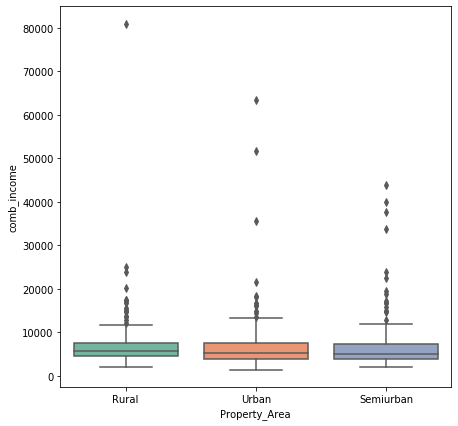

In [113]:
#boxplot for categorical variables
#box_prop_area = sns.boxplot(x='Property_Area', y='comb_income', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_prop_area = sns.boxplot(x='Property_Area', y='comb_income', data=loan_df, palette='Set2', ax=ax)

#observation:
#1. Urban property area has more variation in comb_income and has more outliers than rural/semiurban 
#2. Rural and semiurban has approximately equal variance in comb_income

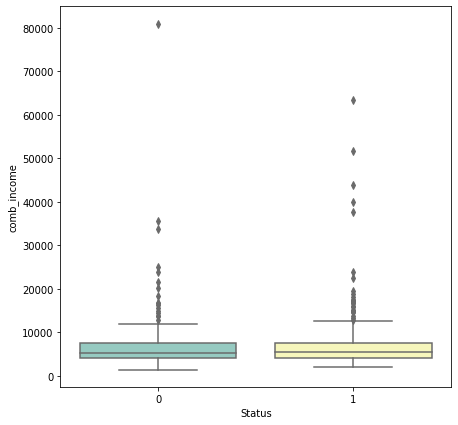

In [114]:
#boxplot for categorical variables
#box_com_inc = sns.boxplot(x='Status', y='comb_income', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_com_inc = sns.boxplot(x='Status', y='comb_income', data=loan_df, palette='Set3', ax=ax)

#observation:
#1. Variation is almost equal in combined income for approved and rejected loans
#2. Outliers are high in comb_income for approved loans

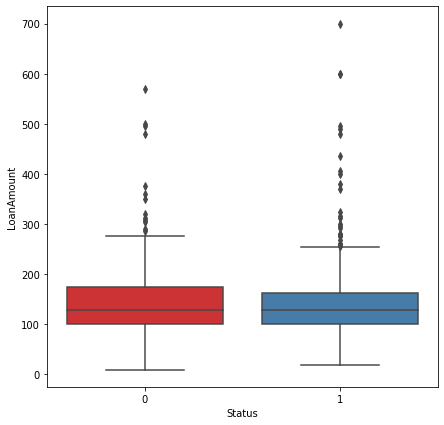

In [115]:
#boxplot for categorical variables
#box_Loan_Amt = sns.boxplot(x='Status', y='LoanAmount', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_Loan_Amt = sns.boxplot(x='Status', y='LoanAmount', data=loan_df, palette='Set1', ax=ax)

#observation:
#1. Loan Amount varies according to status and the variation is more in rejected loans
#2. Outliers are more in approved loans

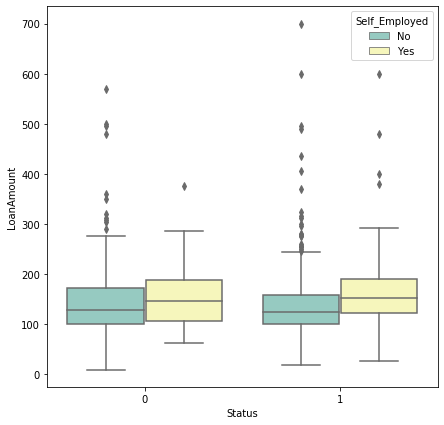

In [116]:
#boxplot for categorical variables
#box_Loan_amt_hue = sns.boxplot(x='Status', y='LoanAmount', hue='Self_Employed', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_Loan_amt_hue = sns.boxplot(x='Status', y='LoanAmount', hue='Self_Employed', data=loan_df, palette='Set3', ax=ax)

#observation:
#1. Loan amount varies at some extent for self employed and not self employed people
#2. Doesnt really has any effect of   self employed and not self employed on loan approval or rejection

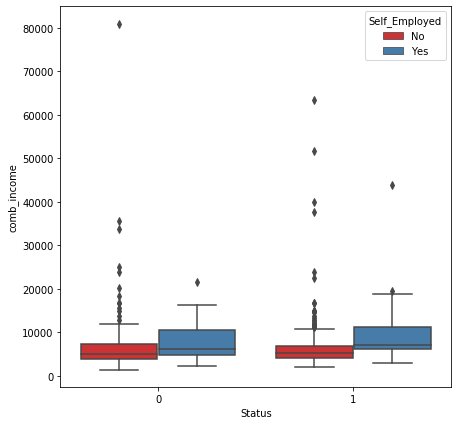

In [117]:
#boxplot for categorical variables
#box_comb_inc_hue = sns.boxplot(x='Status', y='comb_income', hue='Self_Employed', data=loan_df, palette='Set2', linewidth=1.5, width=0.8)
fig_size = (7, 7)
fig, ax = plt.subplots(figsize=fig_size)
box_comb_inc_hue = sns.boxplot(x='Status', y='comb_income', hue='Self_Employed', data=loan_df, palette='Set1', ax=ax)

#observation:
#1. comb_income varies alot of self employed and non self employed people
#2. no such effect of  self employed and not self employed on loan status 

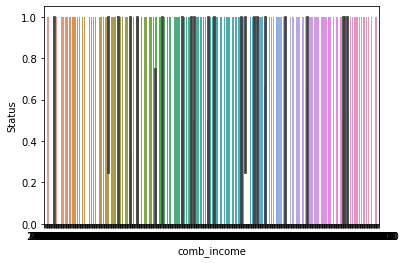

In [118]:
sns.barplot(x='comb_income', y='Status', data=loan_df)

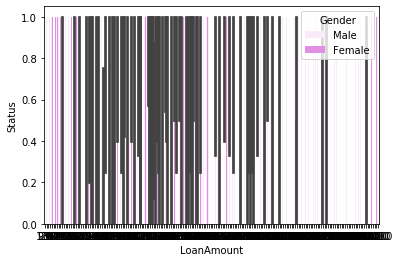

In [119]:
sns.barplot(x='LoanAmount', y='Status', hue='Gender', data=loan_df, color='violet')

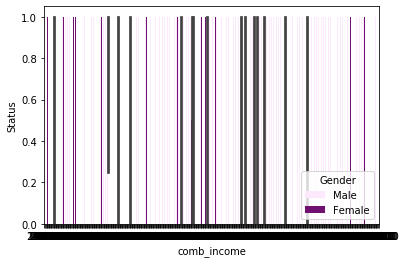

In [120]:
sns.barplot(x='comb_income', y='Status', hue='Gender' ,  data=loan_df, color='purple')

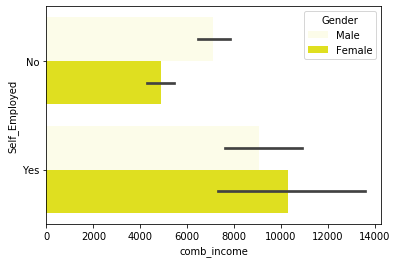

In [121]:
sns.barplot(x='comb_income', y='Self_Employed', hue='Gender' , data=loan_df, color='yellow')

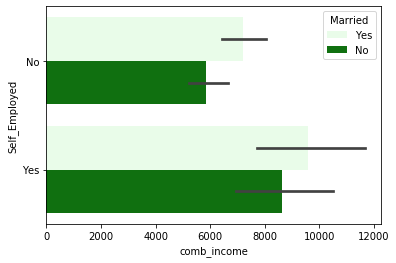

In [122]:
sns.barplot(x='comb_income', y='Self_Employed', hue='Married' , data=loan_df, color='green')

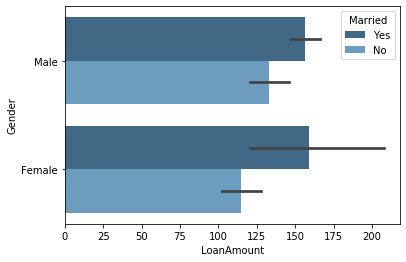

In [123]:
sns.barplot(x='LoanAmount', y='Gender', hue='Married' , data=loan_df, color='brown', palette='Blues_d')

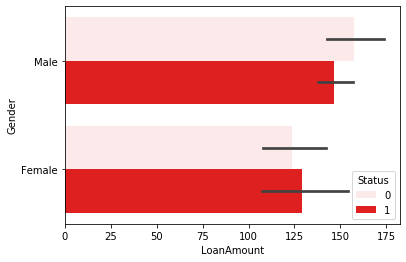

In [124]:
sns.barplot(x='LoanAmount', y='Gender', hue='Status' , data=loan_df, color='red')

## Logistic Regression Model

In [125]:
cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 
       'Property_Area', 'Status']

x = loan_df.drop(cols,axis=1)
y = loan_df['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

y_pred = logmodel.predict(x_test)
y_pred_prob = logmodel.predict_proba(x_test)
y_pred1 = logmodel.predict(x_train)

print(logmodel.intercept_ )
print(logmodel.coef_ )

print(classification_report(y_test , y_pred))
print(classification_report(y_train , y_pred1))

print(confusion_matrix(y_test,y_pred))
print(confusion_matrix(y_train,y_pred1))

print("test accuracy:",accuracy_score(y_test,y_pred )*100)
print("train accuracy:",accuracy_score(y_train,y_pred1)*100)


[-0.86199383]
[[ 2.23094590e+00 -1.22025013e-05]]
              precision    recall  f1-score   support

           0       0.95      0.40      0.56        48
           1       0.79      0.99      0.88       111

    accuracy                           0.81       159
   macro avg       0.87      0.69      0.72       159
weighted avg       0.84      0.81      0.78       159

              precision    recall  f1-score   support

           0       0.90      0.46      0.61       115
           1       0.80      0.98      0.88       255

    accuracy                           0.82       370
   macro avg       0.85      0.72      0.74       370
weighted avg       0.83      0.82      0.80       370

[[ 19  29]
 [  1 110]]
[[ 53  62]
 [  6 249]]
test accuracy: 81.13207547169812
train accuracy: 81.62162162162161


In [126]:
#checking if the test data before and after data cleansing is consistent
y_test.value_counts(normalize=True)

1    0.698113
0    0.301887
Name: Status, dtype: float64

In [127]:
#checking if the train data before and after data cleansing is consistent
y_train.value_counts(normalize=True)

1    0.689189
0    0.310811
Name: Status, dtype: float64

In [128]:
loan_df.Status.value_counts(normalize=True)

1    0.691871
0    0.308129
Name: Status, dtype: float64

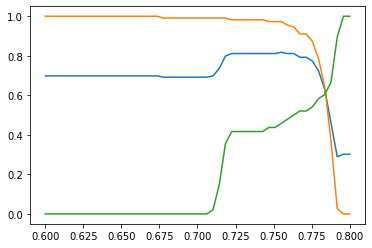

In [129]:
Sensitivity = []
Specificity = []
Accuracy = []
prob_range = np.linspace(0.6,0.8,50)
for pc in prob_range:
   y_pred_res = [1 if np.any(prob>=pc) else 0 for prob in y_pred_prob ]
   conf_mat = confusion_matrix(y_test,y_pred_res)
   Accuracy.append(accuracy_score(y_test,y_pred_res))
   Sensitivity.append(conf_mat[1,1]/(conf_mat[1,1] + conf_mat[1,0]))
   Specificity.append(conf_mat[0,0]/(conf_mat[0,0] + conf_mat[0,1]))

plt.plot(prob_range,Accuracy)
plt.plot(prob_range,Sensitivity)
plt.plot(prob_range,Specificity)
plt.show()

In [130]:
#the probability of being y=1 >= 0.78
y_pred = (logmodel.predict_proba(x_test)[:,1] >= 0.78).astype(bool)
y_pred

array([False,  True, False,  True, False,  True,  True,  True,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,

## ROC Curve

AUC: 0.663


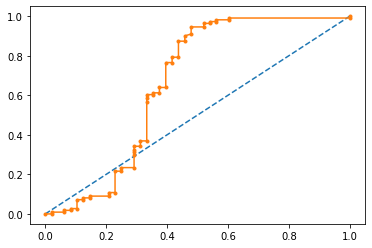

In [131]:
cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 
       'Property_Area', 'Status']

x = loan_df.drop(cols,axis=1)
y = loan_df['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)

#instantiate the classifier
logmodel = LogisticRegression()

#fit a model
logmodel.fit(x_train, y_train)

#predict probabilities and keep probabilities for the positive outcome only
probs = logmodel.predict_proba(x_test)[:,1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

#calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

#plot NO skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()


## Precision Recall curve

f1=0.880 auc=0.663 ap=0.731


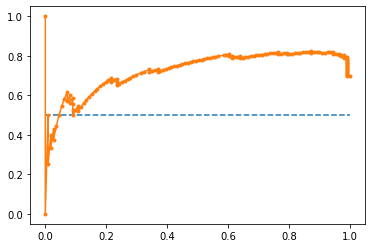

In [132]:
cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 
       'Property_Area', 'Status']

x = loan_df.drop(cols,axis=1)
y = loan_df['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)

#instantiate the classifier
logmodel = LogisticRegression()

#fit a model
logmodel.fit(x_train, y_train)

#predict probabilities and keep probabilities for the positive outcome only
probs = logmodel.predict_proba(x_test)[:,1]

#predict class values
y_pred = logmodel.predict(x_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, y_pred)

# calculate precision-recall AUC
#auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

## KNN Starts Here

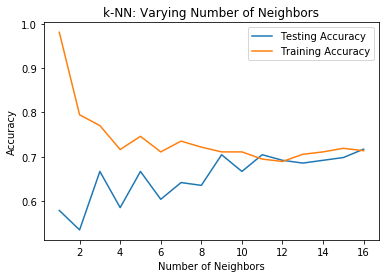

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1]
test score: 0.7169811320754716 train score: 0.7135135135135136


In [133]:
cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 
       'Property_Area', 'Status',]

x = loan_df.drop(cols,axis=1)
y = loan_df['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=20)

neighbors = np.arange(1, 17)
train_accuracy = np.empty(len(neighbors))   # creates an empty array of size 9
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train) 
    train_accuracy[i] = knn.score(x_train,y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


#took the appropriate value of k
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(y_pred)
score = knn.score(x_test, y_test)
score1 = knn.score(x_train, y_train)
print("test score:",score, "train score:",score1)

In [134]:
print(confusion_matrix(y_test , y_pred))

pd.crosstab(y_test , y_pred , rownames=["True"], colnames=["Predicted"] ,margins=True)

[[  9  39]
 [  6 105]]


Predicted,0,1,All
True,,,
0,9,39,48
1,6,105,111
All,15,144,159


In [135]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.60      0.19      0.29        48
           1       0.73      0.95      0.82       111

    accuracy                           0.72       159
   macro avg       0.66      0.57      0.55       159
weighted avg       0.69      0.72      0.66       159




# ROC (Reciever Operating Charecteristic) curve
It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.
An ROC curve demonstrates several things:
1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
4) The area under the curve is a measure of test accuracy '''

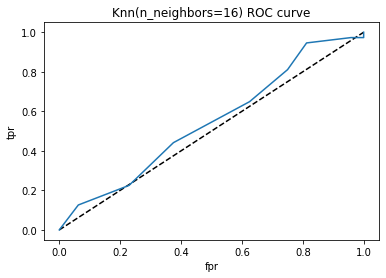

In [137]:
y_pred_proba = knn.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=16) ROC curve')
plt.show()

Hyperparameter tuning
The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.
There is a better way of doing it which involves:
1) Trying a bunch of different hyperparameter values
2) Fitting all of them separately
3) Checking how well each performs
4) Choosing the best performing one
5) Using cross-validation every time
Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.

In [138]:
#import GridSearchCV

from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors': np.arange(1,150)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid)
knn_cv.fit(x,y)

print("KNN Best Score : " , knn_cv.best_score_)

print("KNN Best K Fit : " , knn_cv.best_params_)


KNN Best Score :  0.6918714555765595
KNN Best K Fit :  {'n_neighbors': 33}


In [139]:
knnf = KNeighborsClassifier()

knnf.fit(x,y)

y_pred = knnf.predict(x)

y_pred.shape

(529,)

In [0]:
loan_df["Prediction"] = y_pred

In [141]:
pd.pivot_table (  data  = loan_df , index="Status" ,  aggfunc='count')

,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Married,Prediction,Property_Area,Self_Employed,comb_income
Status,,,,,,,,,,,,
0,163,163,163,163,163,163,163,163,163,163,163,163
1,366,366,366,366,366,366,366,366,366,366,366,366


Here, this pivot tables gives total values that are predicted correctly and incorrectly for all the given feature.
For Example: Considering Credit_History feature, there are 529 observations. Out of which 163 are predicted as False and 366 are predicted as True.

This concludes that logistic regression model best suits this loan status prediction problem.